# Librerias

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Lectura datos

In [38]:
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')

y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

# Lectura de modelos

In [2]:
import pickle

reg_log_model = pickle.load(open('../data/modelos/reg_log.pkl', 'rb'))
arboles_model = pickle.load(open('../data/modelos/decision_tree.pkl', 'rb'))
bagging_tree = pickle.load(open('../data/modelos/bagging.pkl', 'rb'))
bagging_rl = pickle.load(open('../data/modelos/bagging_rl.pkl', 'rb'))
rf_model = pickle.load(open('../data/modelos/random_forest.pkl', 'rb'))
boosting_model = pickle.load(open('../data/modelos/gradient_boost.pkl', 'rb'))
xgb_model = pickle.load(open('../data/modelos/xgb.pkl', 'rb'))
nn_model = pickle.load(open('../data/modelos/nn.pkl', 'rb'))
svm_model = pickle.load(open('../data/modelos/svm.pkl', 'rb'))
stacking_model = pickle.load(open('../data/modelos/stacking.pkl', 'rb'))

# Resultados CV

In [92]:
import os

idx_list = ['fit_time','score_time','cv_accuracy','cv_precision','cv_recall','cv_f1','cv_auc']
cv_path = '../data/cv_results'

dataframes_cv = {}
for filename in os.listdir(cv_path):
    file_path = os.path.join(cv_path, filename)
    base_name = os.path.splitext(filename)[0]
    dataframes_cv[base_name + '_cv'] = pd.read_csv(file_path)
    dataframes_cv[base_name + '_cv'].index = idx_list
    dataframes_cv[base_name + '_cv'].columns = [base_name]

In [93]:
concatenated_dfs = []

# Iterate through the DataFrames in the dictionary
for key, df in dataframes_cv.items():
    # Add each DataFrame to the list
    concatenated_dfs.append(df)

# Concatenate the DataFrames along columns (axis=1)
results_cv = pd.concat(concatenated_dfs, axis=1)

results_cv

,bagging,bagging_rl,decision_tree,gradientboost,nn,randomforest,reg_log,stacking,svm,xgb
fit_time,0.67,11.90,0.01,0.72,1.19,1.11,0.30,14.81,0.13,0.31
score_time,0.06,0.03,0.03,0.01,0.01,0.11,0.01,0.13,0.18,0.02
cv_accuracy,0.82,0.80,0.82,0.84,0.82,0.84,0.79,0.85,0.79,0.84
cv_precision,0.78,0.72,0.76,0.80,0.75,0.78,0.72,0.80,0.74,0.79
cv_recall,0.64,0.63,0.66,0.70,0.69,0.71,0.62,0.72,0.57,0.70
cv_f1,0.70,0.67,0.70,0.74,0.72,0.75,0.67,0.76,0.64,0.74
cv_auc,0.88,0.85,0.88,0.90,0.88,0.90,0.85,0.91,0.85,0.90


# Resultados Test

In [52]:
idx_list = ['AUC','Accuracy','Recall','Precision','F1-score']
test_path = '../data/resultados'

dataframes_test = {}
for filename in os.listdir(test_path):
    file_path = os.path.join(test_path, filename)
    base_name = os.path.splitext(filename)[0]
    dataframes_test[base_name + '_test'] = pd.read_csv(file_path)
    dataframes_test[base_name + '_test'].index = idx_list
    dataframes_test[base_name + '_test'].columns = [base_name]


In [57]:
concatenated_dfs = []

# Iterate through the DataFrames in the dictionary
for key, df in dataframes_test.items():
    # Add each DataFrame to the list
    concatenated_dfs.append(df)

# Concatenate the DataFrames along columns (axis=1)
results_test = pd.concat(concatenated_dfs, axis=1)

In [58]:
results_test

,bagging,bagging_rl,decision_tree,gradient_boost,nn,random_forest,reg_log,stacking,svm,xgb
AUC,0.75,0.72,0.77,0.79,0.79,0.79,0.72,0.80,0.70,0.77
Accuracy,0.81,0.78,0.81,0.83,0.83,0.82,0.78,0.84,0.78,0.82
Recall,0.59,0.55,0.65,0.67,0.70,0.70,0.55,0.70,0.49,0.64
Precision,0.78,0.71,0.75,0.79,0.76,0.75,0.72,0.78,0.74,0.77
F1-score,0.67,0.62,0.70,0.72,0.73,0.72,0.62,0.74,0.59,0.70


# Visualizacion de resultados

## CV

In [95]:
results_cv_charts = results_cv.T

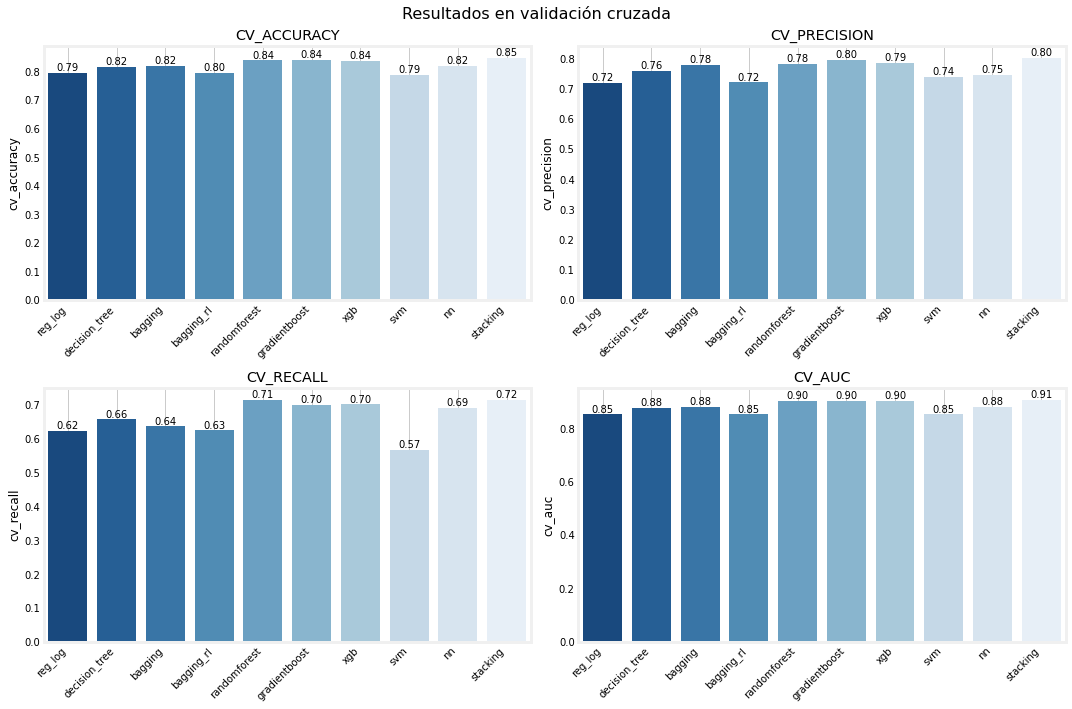

In [100]:
cols = ['cv_accuracy', 'cv_precision','cv_recall','cv_auc']
order = ['reg_log', 'decision_tree', 'bagging', 'bagging_rl', 'randomforest', 'gradientboost', 'xgb', 'svm', 'nn', 'stacking']

num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

fig.suptitle("Resultados en validación cruzada", fontsize=16)

for i, col in enumerate(cols):
    row_index = i // num_cols  # Calculate row index
    col_index = i % num_cols   # Calculate column index

    ax = sns.barplot(data=results_cv_charts, x=results_cv_charts.index, y=col, palette='Blues_r', ax=axes[row_index, col_index], order=order)
    ax.grid(b=None)
    ax.set_facecolor('white')
    ax.set_title(f'{col.upper()}')
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Remove empty subplots if there are more subplots than required
for i in range(len(cols), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


## Test

In [97]:
results_test_charts = results_test.T

In [98]:
results_test_charts

,AUC,Accuracy,Recall,Precision,F1-score
bagging,0.75,0.81,0.59,0.78,0.67
bagging_rl,0.72,0.78,0.55,0.71,0.62
decision_tree,0.77,0.81,0.65,0.75,0.70
gradient_boost,0.79,0.83,0.67,0.79,0.72
nn,0.79,0.83,0.70,0.76,0.73
random_forest,0.79,0.82,0.70,0.75,0.72
reg_log,0.72,0.78,0.55,0.72,0.62
stacking,0.80,0.84,0.70,0.78,0.74
svm,0.70,0.78,0.49,0.74,0.59
xgb,0.77,0.82,0.64,0.77,0.70


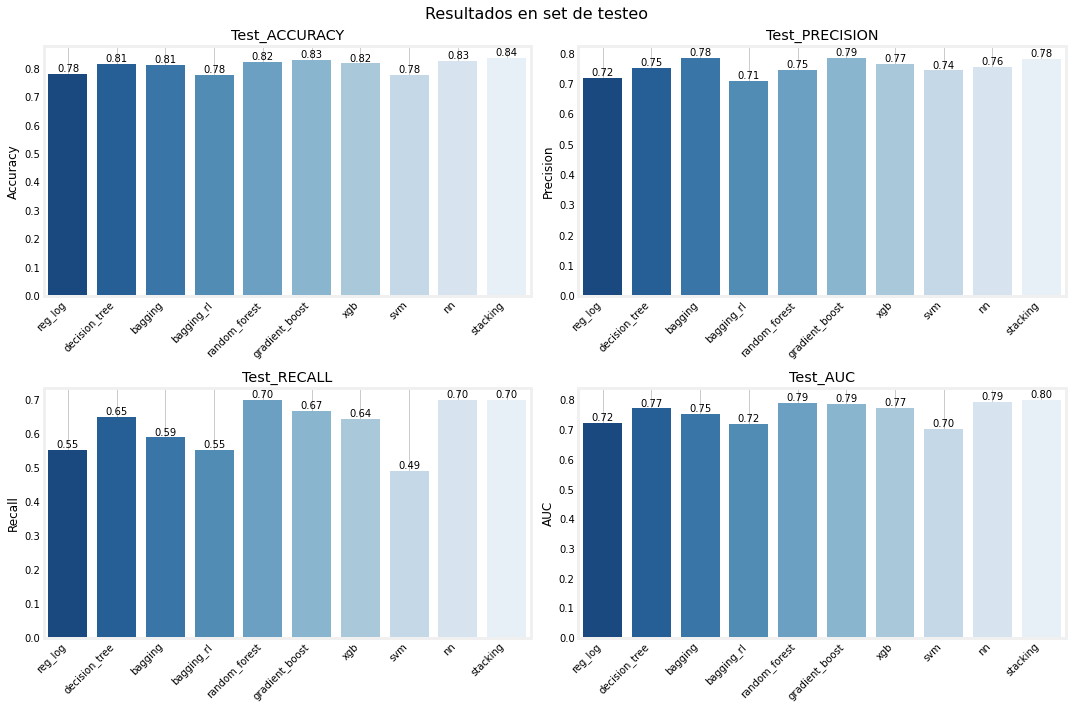

In [104]:
cols = ['Accuracy', 'Precision','Recall','AUC']
order = ['reg_log', 'decision_tree', 'bagging', 'bagging_rl', 'random_forest', 'gradient_boost', 'xgb', 'svm', 'nn', 'stacking']

num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

fig.suptitle("Resultados en set de testeo", fontsize=16)

for i, col in enumerate(cols):
    row_index = i // num_cols  # Calculate row index
    col_index = i % num_cols   # Calculate column index

    ax = sns.barplot(data=results_test_charts, x=results_test_charts.index, y=col, palette='Blues_r', ax=axes[row_index, col_index], order=order)
    ax.grid(b=None)
    ax.set_facecolor('white')
    ax.set_title(f'Test_{col.upper()}')
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Remove empty subplots if there are more subplots than required
for i in range(len(cols), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()
